## Projeto 1: Interpretabilidade de Modelos




#### Equipe:
- João Gabriel de Araújo Vasconcelos
- Luisa Nogueira Costa Cavalcante
- Maria Eduarda Barros Mota

### Tema

Neste projeto, utilizaremos uma base de dados de avaliações de filmes do IMDB para desenvolver e testar modelos de Machine Learning para análise de sentimentos, classificando as avaliações como 'positivas' ou 'negativas'. O foco será avaliar o desempenho desses modelos e aplicar métodos de interpretabilidade estudados em aula, com o objetivo de compreender melhor as decisões tomadas pelos algoritmos.

A base de dados utilizada foi:https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/input

### Leitura e interpretação dos dados:

Inicialmente vamos ler a base de dados, que está no formato csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

Só existem 2 classes: positivo e negativo

In [4]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

As bases estão balanceadas com 25 mil amostras cada

In [5]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Como temos uma base balanceada, podemos já iniciar o ajuste das informações.

### Tratando os dados

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

A seguir, faremos uma limpeza dos dados, com o objetivo de transformar o texto em um formato mais adequado para os algoritmos.

transformaremos todo o texto em mínusculo, retiraremos qualquer palavra que começa com @, podendo ser a forma que se identifica usuários em redes sociais, o que não nos interessa.
 Removemos também qualquer tipo de link que comecem com http
além disso removemos qualquer tipo de link de imagem terminado em .pic
Fizemos a substituição de qualquer caracter que não seja uma letra em um espaço
As pontuações foram também 


Após ter um texto padronizado, o texto foi transformado em tokens e removemos stop wrds da lingua inglesa ou qualquer palavra de tamanho 1 ou 2
Como durante o processo foi adicionado espaços a mais dentro do texto substituimos qualquer espaço em branco com mais de um espaço em um espaço único

In [9]:
# cleaning The Data
from nltk.stem import PorterStemmer  # Substituir o LancasterStemmer pelo PorterStemmer
from nltk.corpus import stopwords
import re
import string

# Initialize stemmer and stopwords
stemmer = PorterStemmer()  # Usando PorterStemmer em vez de LancasterStemmer
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
   # text = " ".join([stemmer.stem(i) for i in words if i not in stop_words and len(i) > 2])

    text = re.sub(r"\s+", " ", text).strip()
    return text

df["Review_Cleaning"] = df['review'].apply(cleaning_data)


In [10]:
df

review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                         Review_Cleaning  
0      one reviewers mentioned watching episode hooke...  
1      wonderful little production filming technique ...  
2      thought wonderful way spend time hot summer we...  
3      basically family little boy jake thinks zombie...  
4      petter mattei love time money visually stunnin...  
...                                                  ...  
49995  thought movie right good job creative original...  
49996  bad plot bad dialogue bad acting idiotic direc...  
49997  catholic taught parochial elementary schools n...  
49998  going disagree previous comment side maltin on...  
49999  one expects star trek movies high art fans exp...  

[50000 rows x 3 columns]

Agora, temos a etapa de categorizar os sentimentos. No nosso projeto, 1 será uma avaliação positiva e 0 negativa.

In [ ]:
df['sentiment_mapped'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

### Divisão do Conjunto de Treino e Teste

In [12]:
X = df['Review_Cleaning']
y = df['sentiment_mapped']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train

39087    kept asking many fights screaming matches swea...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent mood love draw...
16398    latter day fulci schlocker totally abysmal con...
13653    first firmly believe norwegian movies continua...
                               ...                        
11284    shadow magic recaptures joy amazement first mo...
44732    found movie quite enjoyable fairly entertainin...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bit short time pa...
Name: Review_Cleaning, Length: 40000, dtype: object

In [15]:
y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment_mapped, Length: 40000, dtype: int64

### Vetorizar o Review

Para utilizar os modelos de Machine Learning, os textos das resenhas de filmes foram convertidos em vetores numéricos usando a técnica TF-IDF, que mede a relevância de cada termo no conjunto de dados.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Etapa 1: Vetorização usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# Verificando as dimensões do vetor resultante
print(X_train_vectorized.shape)


(40000, 1000)


## Aplicando os Modelos

Iremos treinar 2 modelos, Naive Bayes e Random Forest
Vamos utilizar as técnicas de PFI,LIME, PDP e Global Surrogate  para interpretabilidade dos modelos
Além disso, para o modelo de Random Forest vamos utilizar feature importance

### Naive Bayes

#### Treinando o modelo

Vamos usar optuna para escolher os melhores hiperparâmetros

In [17]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Para selecionar os melhores modelos vamos utilizar o optuna 

In [18]:
import optuna
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

c:\Users\danin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Callback function to save the best model
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])

In [20]:
def objective_nb(trial):
    # Sugerir um valor para alpha
    params_nb = {
        'alpha': trial.suggest_float('alpha', 1e-10, 10.0),
        'fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    nb_model = MultinomialNB(**params_nb)

    nb_model.fit(X_train_vectorized, y_train)

    y_pred = nb_model.predict(X_test_vectorized)
    y_pred_score_positive = nb_model.predict_proba(X_test_vectorized)[:,1]

    trial.set_user_attr('roc_auc', roc_auc_score(y_test, y_pred_score_positive))
    trial.set_user_attr('accuracy', accuracy_score(y_test, y_pred))
    trial.set_user_attr('precision', precision_score(y_test, y_pred))
    trial.set_user_attr('recall', recall_score(y_test, y_pred))
    trial.set_user_attr('f1', f1_score(y_test, y_pred))
    
    trial.set_user_attr(key="best_model", value=nb_model)

    return accuracy_score(y_test, y_pred)


# Optimize Naive Bayes
start_time_nb = time.time()
study_nb = optuna.create_study(direction='maximize')
study_nb.optimize(objective_nb, n_trials=50, callbacks=[callback])
end_time_nb = time.time()
duration_nb = end_time_nb - start_time_nb


[I 2024-10-09 14:03:48,401] A new study created in memory with name: no-name-d4860b8c-db3c-4fc0-8766-f1db4920a918
[I 2024-10-09 14:03:48,564] Trial 0 finished with value: 0.8361 and parameters: {'alpha': 6.483283031672574, 'fit_prior': False}. Best is trial 0 with value: 0.8361.
[I 2024-10-09 14:03:48,695] Trial 1 finished with value: 0.8362 and parameters: {'alpha': 0.23552466673098357, 'fit_prior': False}. Best is trial 1 with value: 0.8362.
[I 2024-10-09 14:03:48,834] Trial 2 finished with value: 0.8363 and parameters: {'alpha': 4.072739188419053, 'fit_prior': True}. Best is trial 2 with value: 0.8363.
[I 2024-10-09 14:03:48,987] Trial 3 finished with value: 0.8361 and parameters: {'alpha': 6.622633693130946, 'fit_prior': False}. Best is trial 2 with value: 0.8363.
[I 2024-10-09 14:03:49,118] Trial 4 finished with value: 0.8367 and parameters: {'alpha': 8.542998985367577, 'fit_prior': True}. Best is trial 4 with value: 0.8367.
[I 2024-10-09 14:03:49,253] Trial 5 finished with value:

Resultados do optuna para o naive bayes

In [21]:
print('Naive Bayes Results:')
print('Number of finished trials:', len(study_nb.trials))
print('Best trial:', study_nb.best_trial.params)
print(f'Duration: {duration_nb:.2f} seconds')

# Get the best Naive Bayes model
nb_model_best = study_nb.user_attrs["best_model"]

Naive Bayes Results:
Number of finished trials: 50
Best trial: {'alpha': 9.74890364245133, 'fit_prior': True}
Duration: 7.79 seconds


In [22]:
y_pred_nb = nb_model_best.predict(X_test_vectorized)

In [23]:
print('\nBest Naive Bayes Model Test Accuracy:', accuracy_score(y_test, y_pred_nb))


Best Naive Bayes Model Test Accuracy: 0.8371


#### Interpretabilidade - Naive Bayes

Com o modelo já ajustado e executado, vamos trabalhar com alguns aspectos de interpretabilidade.

##### PFI 

Aqui, vamos realizar uma análise de importância das características utilizando a técnica de Permutation Feature Importante. 

Essa abordagem permite identificar quais características têm maior impacto na performance do modelo.

In [24]:
from sklearn.inspection import permutation_importance


In [25]:
import sklearn
print(sklearn.__version__)

1.3.2


In [26]:
X_test_dense = X_test_vectorized.toarray()

In [27]:
import numpy as np
# Calcular a importância de permutação
result = permutation_importance(
    nb_model_best, X_test_dense, y_test,
    n_repeats=30, random_state=42, scoring='accuracy'
)

# Obter os índices das características ordenadas por importância
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Obter os nomes das características
feature_names = vectorizer.get_feature_names_out()

# Exibir as top N características mais importantes
N = 10
top_features = feature_names[indices[:N]]
top_importances = importances[indices[:N]]

print("Top 10 características mais importantes:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")


Top 10 características mais importantes:
bad: 0.0063
worst: 0.0052
waste: 0.0046
terrible: 0.0030
awful: 0.0028
excellent: 0.0027
great: 0.0024
horrible: 0.0023
poor: 0.0022
perfect: 0.0020


Na análise, observamos que apenas palavras que expressam opiniões positivas, como "excellent" e "perfect", e negativas, como "bad", "worst" e "waste", estão entre as características mais relevantes para a classificação. 

Esses resultados corroboram a relevância das palavras identificadas, demonstrando que elas são eficazes para a tarefa de classificação de sentimentos.

Agora, vamos calcular a importância das características (palavras) para cada classe do modelo. 

Por fim, teremos as palavras que mais influenciam as classificações de sentimentos.

In [28]:
feature_probs = nb_model_best.feature_log_prob_

features = vectorizer.get_feature_names_out()
importance = pd.DataFrame(feature_probs, columns=features)

for i in range(len(importance)):
    print(f"Classe {i}:")
    print(importance.iloc[i].nlargest(10))  # 10 palavras mais importantes
    print("\n")


Classe 0:
movie    -4.337058
film     -4.618338
one      -4.980752
like     -5.036157
bad      -5.059909
even     -5.248877
good     -5.300783
would    -5.310529
really   -5.405602
time     -5.449268
Name: 0, dtype: float64


Classe 1:
film    -4.499154
movie   -4.541736
one     -4.947033
great   -5.153101
good    -5.244468
like    -5.250406
story   -5.305404
well    -5.330317
see     -5.365562
time    -5.421764
Name: 1, dtype: float64




Agora, vamos analisar a importância das palavras, calculando a diferença nas probabilidades logarítmicas entre as classes negativa (0) e positiva (1). Isso nos permite identificar as palavras mais características de cada classe.

In [29]:
# Probabilidades logarítmicas das palavras em cada classe
feature_probs = nb_model_best.feature_log_prob_

# Pegando os nomes das features (palavras)
features = vectorizer.get_feature_names_out()

# Criando um DataFrame para visualizar
importance = pd.DataFrame(feature_probs, columns=features)

# Calculando a diferença entre as classes
importance_diff = importance.loc[1] - importance.loc[0]  # Classe 1 - Classe 0

# Mostrando as 10 palavras mais características de cada classe
print("Top 10 palavras mais características da classe 0 (negativa):")
print(importance_diff.nsmallest(10))  # Mais associadas à classe 0 (valores negativos)

print("\nTop 10 palavras mais características da classe 1 (positiva):")
print(importance_diff.nlargest(10))  # Mais associadas à classe 1 (valores positivos)


Top 10 palavras mais características da classe 0 (negativa):
waste       -2.438905
worst       -2.319768
awful       -2.119560
terrible    -1.866737
poorly      -1.798605
pointless   -1.701847
horrible    -1.694376
lame        -1.666461
wasted      -1.635397
worse       -1.632533
dtype: float64

Top 10 palavras mais características da classe 1 (positiva):
superb       1.580079
wonderful    1.529327
excellent    1.525126
fantastic    1.290893
amazing      1.249649
brilliant    1.223383
perfect      1.198232
favorite     1.170568
loved        1.154249
powerful     1.142420
dtype: float64


Podemos ver que mesmo existindo palavras genéricas como film, movie, one story ao analisar a diferença entre as classes, as palavras genéricas são ignoradas. 

#### LIME

Agora, vamos aplicar o LIME,  Local Interpretable Model-Agnostic Explanations, para entender com mais detalhes as previsões do nosso modelo de classificação, identificando as palavras mais influentes, que foram importantes nas decisões para cada review. 

Esse método nos ajuda a entender como o modelo classifica uma opinião específica como positivas ou negativas.

In [30]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
print(X_test.index)

Index([33553,  9427,   199, 12447, 39489, 42724, 10822, 49498,  4144, 36958,
       ...
       29598, 43515, 15832, 37692, 26859, 28567, 25079, 18707, 15200,  5857],
      dtype='int64', length=10000)


In [32]:
import random

def get_random_index(x_test):
    indices = x_test.index.tolist()
    random_index = random.choice(indices)

    return random_index

random_index = get_random_index(X_test)
random_index
X_test[random_index]

'les visiteurs first movie medieval time travelers actually funny like jean reno actor unexpected twists funny situations course plain absurdness would remind little bit louis funes sequel characters actors great part time traveling plot changes little since characters supposed experienced time travelers jump history without paying attention fact keeps getting absurder advance movie duke jean reno tries keep whole thing together playing character emptied lot save film duke slave helper really attention movie merely clumsy annoying stupid whatever supposed fact character tries produce laughter audience succeed someone telling really bad joke already know insists telling joke till end adding details make suffering little longer liked les visiteurs spoil taste mouth sequel like les visiteurs would never consider seeing sequel liked sequel well suppose still need see lot movies'

In [33]:
print('Original Text')
df['review'][random_index]

Original Text


"Les Visiteurs, the first movie about the medieval time travelers was actually funny. I like Jean Reno as an actor, but there was more. There were unexpected twists, funny situations and of course plain absurdness, that would remind you a little bit of Louis de Funes.<br /><br />Now this sequel has the same characters, the same actors in great part and the same time traveling. The plot changes a little, since the characters now are supposed to be experienced time travelers. So they jump up and down in history, without paying any attention to the fact that it keeps getting absurder as you advance in the movie. The duke, Jean Reno, tries to keep the whole thing together with his playing, but his character has been emptied, so there's not a lot he can do to save the film.<br /><br />Now the duke's slave/helper, he has really all the attention. The movie is merely about him and his being clumsy / annoying / stupid or whatever he was supposed to be. Fact is; this character tries to produce 

O texto que será utilizado para avaliação do LIME será:
Les Visiteurs, the first movie about the medieval time travelers was actually funny. I like Jean Reno as an actor, but there was more. There were unexpected twists, funny situations and of course plain absurdness, that would remind you a little bit of Louis de Funes.Now this sequel has the same characters, the same actors in great part and the same time traveling. The plot changes a little, since the characters now are supposed to be experienced time travelers. So they jump up and down in history, without paying any attention to the fact that it keeps getting absurder as you advance in the movie. The duke, Jean Reno, tries to keep the whole thing together with his playing, but his character has been emptied, so there's not a lot he can do to save the film.Now the duke's slave/helper, he has really all the attention. The movie is merely about him and his being clumsy / annoying / stupid or whatever he was supposed to be. Fact is; this character tries to produce the laughter from the audience, but he does not succeed. It is as if someone was telling you a really very very bad joke, you already know, but he insists on telling that joke till the end, adding details, to make your suffering a little longer.If you liked Les Visiteurs, do not spoil the taste in your mouth with the sequel. If you didn't like Les Visiteurs, you would never consider seeing the sequel. If you liked this sequel... well, I suppose you still need to see a lot of movies.


In [34]:
from lime.lime_text import LimeTextExplainer
import numpy as np

explainer = LimeTextExplainer(class_names=['negative', 'positive'])

text_instance = X_test[random_index]


exp = explainer.explain_instance(
    text_instance,  # Passando a resenha como string
    lambda x: nb_model_best.predict_proba(vectorizer.transform(x)),  # Transformando a entrada para o modelo
    num_features=10
)

# Exibir informações
print('Document id: %d' % random_index)
#print('Original Text:', df['review'][idx])
print('Probability(positive) =', nb_model_best.predict_proba(vectorizer.transform([text_instance]))[0, 1])  # Probabilidade da classe positiva
print('True class: %s' % ('positive' if y_test[random_index] == 1 else 'negative'))

exp.show_in_notebook()


Document id: 25815
Probability(positive) = 0.23149991660784283
True class: negative


Aqui, podemos ter uma visão das principais palavras que o modelo atribui como um posicionamento positivo ou negativo em relação ao texto. 

Além disso, temos a probabilidade da classe negativa (77) em que foi calculada pelo modelo, e a sua classe real

Como a classe negativa tem uma probabilidade maior que 50% ela seria classificada com negativa

Palavras como joke, stupid e annoying foram utilizadas para classificar a frase como negativa


In [35]:
def analyze_custom_review(review_text, nb_model, vectorizer):
    explainer = LimeTextExplainer(class_names=['negative', 'positive'])

    exp = explainer.explain_instance(
        review_text,
        lambda x: nb_model.predict_proba(vectorizer.transform(x)),
        num_features=10
    )

    # Display information
    print('Custom Review Analysis')
    print('Original Text:', review_text)
    print('Probability(positive) =', nb_model_best.predict_proba(vectorizer.transform([review_text]))[0, 1])
    print('Predicted class: %s' % ('positive' if nb_model_best.predict(vectorizer.transform([review_text]))[0] == 1 else 'negative'))

    # Show explanation
    exp.show_in_notebook()

custom_review = "The movie started out with a really slow pace, and it didn't pick up that much, tbh. Nevertheless, it was really good. No wonder people say it's a classic. The soundtrack, the cinematography, the acting, the plot, the twists, the turns, the characters, all of it was just amazing. I'm so glad I watched it."
analyze_custom_review(custom_review, nb_model_best, vectorizer)

Custom Review Analysis
Original Text: The movie started out with a really slow pace, and it didn't pick up that much, tbh. Nevertheless, it was really good. No wonder people say it's a classic. The soundtrack, the cinematography, the acting, the plot, the twists, the turns, the characters, all of it was just amazing. I'm so glad I watched it.
Probability(positive) = 0.5830060239019232
Predicted class: positive


Já para um segundo texto temos as palavras amazing levando para um lado positivo.

#### PDPs

Agora, aplicando PDP, teremos uma visão clara de como algumas palavras previamente selecionadas impactam as previsões do modelo, incluindo a relação de não linearidade entre as variáveis e a resposta do modelo, facilitando a interpretação dos resultados.

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

Selecionamos as 5 features mais importantes:
bad: 0.0060
worst: 0.0054
waste: 0.0048
terrible: 0.0031
great: 0.0031


In [37]:
top_5_features = top_features[:5]

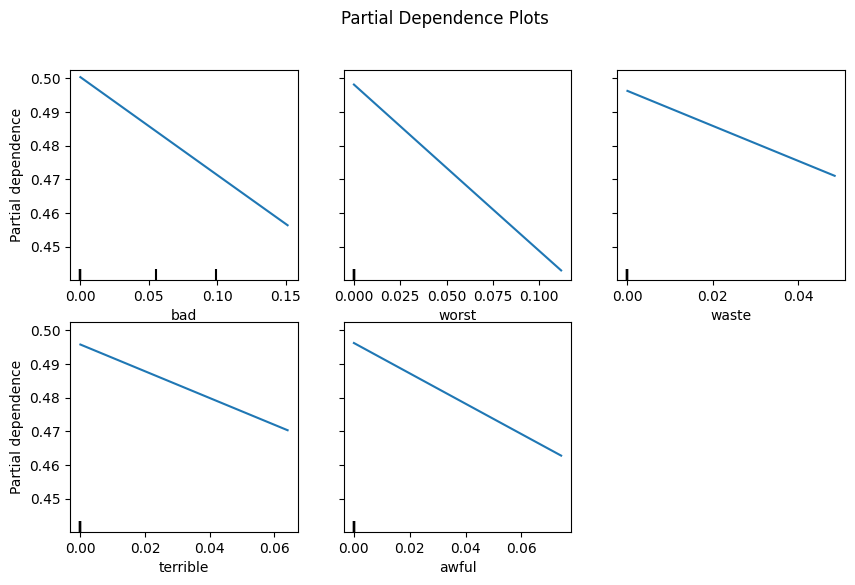

In [38]:
# Obter os índices correspondentes na matriz esparsa
feature_indices = [vectorizer.vocabulary_[word] for word in top_5_features if word in vectorizer.vocabulary_]

# Converter a matriz esparsa em uma matriz densa
X_train_vectorized_dense = X_train_vectorized.toarray()  # Matriz densa

# Criar o gráfico de dependência parcial
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    nb_model_best,  
    X_train_vectorized_dense,  
    features=feature_indices,
    ax=ax,
    feature_names=vectorizer.get_feature_names_out()  # Para nomear as características
)
plt.suptitle("Partial Dependence Plots")
plt.show()

Os gráficos ilustram uma relação negativa, onde um aumento na frequência de uma palavra negativa leva a uma diminuição na probabilidade prevista de que a avaliação seja positiva. 

Assim, isso sugere que quanto mais frequentemente essas palavras aparecem, menor a probabilidade do review ser considerado positiva.


In [39]:
top_features

array(['bad', 'worst', 'waste', 'terrible', 'awful', 'excellent', 'great',
       'horrible', 'poor', 'perfect'], dtype=object)

#### Global Surrogate

O global surrogate utiliza um modelo interpretável treinado com as predições já feitas por um modelo black box
Escolhemos utilizar uma decision tree como o modelo interpretável 

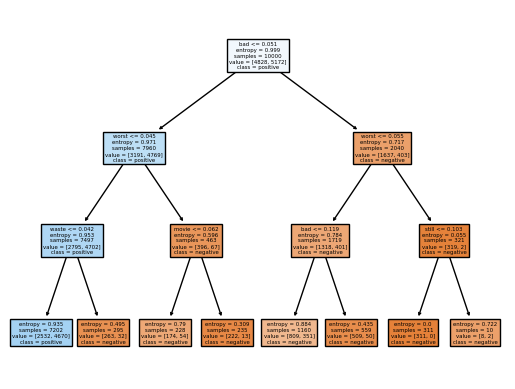

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prever com o modelo Random Forest
Yhat = nb_model_best.predict(X_test_vectorized)

# Treinar a árvore de decisão
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)
dt.fit(X_test_vectorized, Yhat)

# Obter os nomes das características a partir do vectorizer
feature_names = vectorizer.get_feature_names_out()

# Plotar a árvore de decisão
tree.plot_tree(dt, feature_names=feature_names, class_names=['negative', "positive"], filled=True);


Para o global surrogate de um modelo de árvore de decisão baseado em um modelo de Naive Bayes temos que a única forma que um dado é classificado como positivo é quando as palavras 'bad', 'worst', 'waste' não estão muito presentes no texto. Se a palavra 'bad' estiver presente ele já está classificado como uma frase negativa, assim como a palavra worst. 

### Random forest

Agora vamos criar um modelo de random forest para a mesma base de dados e explicar as decisões tomadas pelo modelo

In [41]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Treinando o modelo

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into train and validation sets
X_train_vectorized, X_val, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Random Forest Optimization
def objective_rf(trial):
    params_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 400),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 4, 50),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
    }

    model_rf = RandomForestClassifier(**params_rf, random_state=42, n_jobs=-1, verbose=0)
    model_rf.fit(X_train_vectorized, y_train)

    y_pred = model_rf.predict(X_test_vectorized)
    y_pred_score_positive = model_rf.predict_proba(X_test_vectorized)[:,1]

    trial.set_user_attr('roc_auc', roc_auc_score(y_test, y_pred_score_positive))
    trial.set_user_attr('accuracy', accuracy_score(y_test, y_pred))
    trial.set_user_attr('precision', precision_score(y_test, y_pred))
    trial.set_user_attr('recall', recall_score(y_test, y_pred))
    trial.set_user_attr('f1', f1_score(y_test, y_pred))
    
    trial.set_user_attr(key="best_model", value=model_rf)

    return accuracy_score(y_test, y_pred)

# Callback function to save the best model
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])


# Optimize Random Forest
start_time_rf = time.time()
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50, callbacks=[callback])
end_time_rf = time.time()
duration_rf = end_time_rf - start_time_rf

print('\nRandom Forest Results:')
print('Number of finished trials:', len(study_rf.trials))
print('Best trial:', study_rf.best_trial.params)
print(f'Duration: {duration_rf:.2f} seconds')

# Get the best Random Forest model
best_rf_model = study_rf.user_attrs["best_model"]

# Evaluate the best models on the test set
y_pred_rf = best_rf_model.predict(X_test_vectorized)

print('Best Random Forest Model Test Accuracy:', accuracy_score(y_test, y_pred_rf))

[I 2024-10-09 14:33:18,591] A new study created in memory with name: no-name-6d8048a7-239e-4fbf-adef-b05cb764c65a
[I 2024-10-09 14:33:36,613] Trial 0 finished with value: 0.8366 and parameters: {'n_estimators': 563, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 266, 'min_samples_leaf': 26, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8366.
[I 2024-10-09 14:33:53,396] Trial 1 finished with value: 0.8336 and parameters: {'n_estimators': 605, 'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 212, 'min_samples_leaf': 47, 'max_features': 'log2', 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.8366.
[I 2024-10-09 14:58:14,867] Trial 2 finished with value: 0.7684 and parameters: {'n_estimators': 408, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 227, 'min_samples_leaf': 14, 'max_features': None, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.8366.
[I 2024-10-09 15:00:04,221] 


Random Forest Results:
Number of finished trials: 50
Best trial: {'n_estimators': 646, 'criterion': 'log_loss', 'max_depth': 19, 'min_samples_split': 207, 'min_samples_leaf': 29, 'max_features': 'log2', 'class_weight': None}
Duration: 5879.09 seconds
Best Random Forest Model Test Accuracy: 0.8402


#### feature importance

Como o modelo de random forest é um modelo de árvore podemos calcular o feature importance usando a impureza de gini. 

In [43]:
import pandas as pd

# Obtendo a importância das features
importances = best_rf_model.feature_importances_

# Pegando os nomes das features (palavras)
features = vectorizer.get_feature_names_out()

# Criando um DataFrame para visualizar a importância das features
importance_df = pd.DataFrame(importances, index=features, columns=["Importance"])

# Mostrando as 10 palavras mais importantes
print("Top 10 palavras mais importantes:")
print(importance_df.nlargest(10, 'Importance'))

# Se você ainda deseja visualizar as diferenças entre classes, precisará usar um modelo que suporte isso, como o Naive Bayes.

Top 10 palavras mais importantes:
           Importance
bad          0.048444
worst        0.042974
great        0.032582
awful        0.025905
waste        0.025815
terrible     0.024056
excellent    0.023715
boring       0.017954
worse        0.016514
wonderful    0.016445


#### pfi com random forest


In [44]:
X_test_dense = X_test_vectorized.toarray()


In [49]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calcular a importância de permutação para o modelo Random Forest
result = permutation_importance(
    best_rf_model, X_test_dense, y_test,
    n_repeats=3, random_state=42, scoring='accuracy', n_jobs=-1
)

# Obter os índices das características ordenadas por importância
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Obter os nomes das características
feature_names = vectorizer.get_feature_names_out()

# Exibir as top N características mais importantes
N = 10
top_features = feature_names[indices[:N]]
top_importances = importances[indices[:N]]

print("Top 10 características mais importantes para o Random Forest:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance:.4f}")

Top 10 características mais importantes para o Random Forest:
worst: 0.0108
bad: 0.0099
great: 0.0091
awful: 0.0080
waste: 0.0063
excellent: 0.0050
terrible: 0.0046
poor: 0.0042
well: 0.0042
boring: 0.0040


Top 10 características mais importantes em naive bayes:


bad: 0.0060

worst: 0.0054

waste: 0.0048

terrible: 0.0031

great: 0.0031

awful: 0.0030

excellent: 0.0029

boring: 0.0023

stupid: 0.0022

horrible: 0.0020

Comparando os resultados obtidos em naive bayes usando pfi podemos ver que existiram algumas divergências de importância mas a maioria se manteve no top 10. As palavras stupid e horrible no naive bayes foram substituidas por poor e well, o que acaba tendenciando a uma ideia de que o modelo de random forest tem uma tendência mais positiva. 


#### lime

In [50]:
!pip install lime


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import random

def get_random_index(x_test):
    indices = x_test.index.tolist()
    random_index = random.choice(indices)

    return random_index

random_index = get_random_index(X_test)
random_index
X_test[random_index]

'men white movie definitely one funniest funniest comedy movies ever watched watched quite lot two garbagemen become men white stop invasion space also parody lots classic movies men black star wars strangelove anyone says movie crappy something wrong head tons funny gags jokes might actually get injury mouth laughing hard happened watch movie watch certainly regret'

In [52]:
print('Original Text')
df['review'][random_index]

Original Text


'The "Men in White" movie is definitely one of the funniest, if not THE funniest, comedy movies I ever watched! (and I watched quite a lot!) It is about two garbagemen, who become "Men in White" and then stop an invasion from space. It is also a parody of lots of classic movies, such as "Men in Black", "Star Wars" or "Dr. Strangelove". Anyone who says that this movie is crappy has something wrong with his head. There are tons of funny gags and jokes here, and you might actually get injury to your mouth from laughing too hard (it happened to me!). If you can watch this movie on TV, watch it now - you certainly won\'t regret it!'

In [53]:
from lime.lime_text import LimeTextExplainer
import numpy as np

explainer = LimeTextExplainer(class_names=['negative', 'positive'])

text_instance = X_test[random_index]


exp = explainer.explain_instance(
    text_instance,  # Passando a resenha como string
    lambda x: best_rf_model.predict_proba(vectorizer.transform(x)),  # Transformando a entrada para o modelo
    num_features=10
)

# Exibir informações
print('Document id: %d' % random_index)
#print('Original Text:', df['review'][idx])
print('Probability(positive) =', best_rf_model.predict_proba(vectorizer.transform([text_instance]))[0, 1])  # Probabilidade da classe positiva
print('True class: %s' % ('positive' if y_test[random_index] == 1 else 'negative'))

exp.show_in_notebook()


Document id: 25604
Probability(positive) = 0.5437028652843723
True class: positive


In [54]:
def analyze_custom_review(review_text, nb_model, vectorizer):
    explainer = LimeTextExplainer(class_names=['negative', 'positive'])

    exp = explainer.explain_instance(
        review_text,
        lambda x: best_rf_model.predict_proba(vectorizer.transform(x)),
        num_features=10
    )

    # Display information
    print('Custom Review Analysis')
    print('Original Text:', review_text)
    print('Probability(positive) =', best_rf_model.predict_proba(vectorizer.transform([review_text]))[0, 1])
    print('Predicted class: %s' % ('positive' if best_rf_model.predict(vectorizer.transform([review_text]))[0] == 1 else 'negative'))

    # Show explanation
    exp.show_in_notebook()

custom_review = "The movie started out with a really slow pace, and it didn't pick up that much, tbh. Nevertheless, it was really good. No wonder people say it's a classic. The soundtrack, the cinematography, the acting, the plot, the twists, the turns, the characters, all of it was just amazing. I'm so glad I watched it."
analyze_custom_review(custom_review, best_rf_model, vectorizer)

Custom Review Analysis
Original Text: The movie started out with a really slow pace, and it didn't pick up that much, tbh. Nevertheless, it was really good. No wonder people say it's a classic. The soundtrack, the cinematography, the acting, the plot, the twists, the turns, the characters, all of it was just amazing. I'm so glad I watched it.
Probability(positive) = 0.5461108179131107
Predicted class: positive


Comparando com os resultados obtidos com naive bayes, palavras como amazing e classic ainda se mantem como escolha para a classificação, entretando palavras como slow wonder não afetam a escolha do random forest. O modelo de naive bayes retornou uma probabilidade maior para a classe positiva do que o algoritmo de random forest.

#### PDPs

Agora, aplicando PDP, teremos uma visão clara de como algumas palavras previamente selecionadas impactam as previsões do modelo, incluindo a relação de não linearidade entre as variáveis e a resposta do modelo, facilitando a interpretação dos resultados.

In [55]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [56]:
top_5_features = top_features[:5]

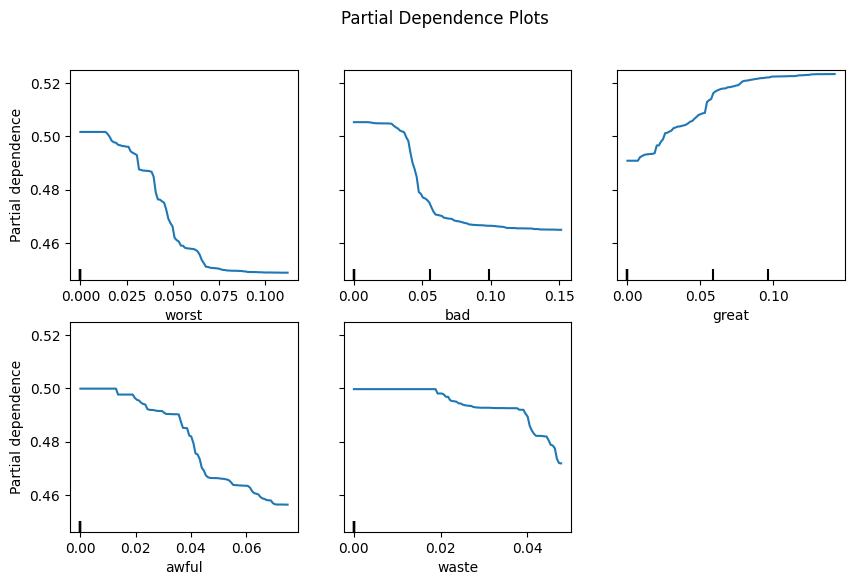

In [57]:
# Obter os índices correspondentes na matriz esparsa
feature_indices = [vectorizer.vocabulary_[word] for word in top_5_features if word in vectorizer.vocabulary_]

# Converter a matriz esparsa em uma matriz densa
X_train_vectorized_dense = X_train_vectorized.toarray()  # Matriz densa

# Criar o gráfico de dependência parcial
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    best_rf_model,  
    X_train_vectorized_dense,  
    features=feature_indices,
    ax=ax,
    feature_names=vectorizer.get_feature_names_out()  # Para nomear as características
)
plt.suptitle("Partial Dependence Plots")
plt.show()

Os gráficos ilustram uma relação negativa, onde um aumento na frequência de uma palavra negativa leva a uma diminuição na probabilidade prevista de que a avaliação seja positiva. 

Além disso analisando a palavra positiva great tende a aumentar probabilidade da classificação do texto ser positiva.

In [58]:
top_features

array(['worst', 'bad', 'great', 'awful', 'waste', 'excellent', 'terrible',
       'poor', 'well', 'boring'], dtype=object)

#### Global Surrogate

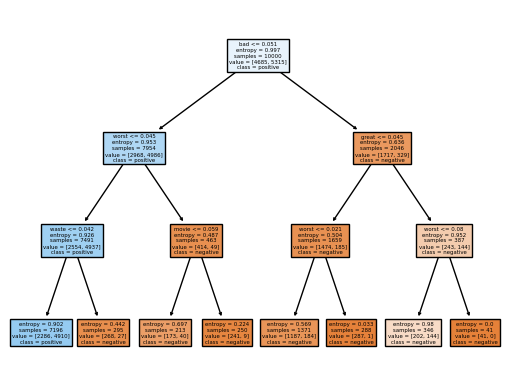

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prever com o modelo Random Forest
Yhat = best_rf_model.predict(X_test_vectorized)

# Treinar a árvore de decisão
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)
dt.fit(X_test_vectorized, Yhat)

# Obter os nomes das características a partir do vectorizer
feature_names = vectorizer.get_feature_names_out()

# Plotar a árvore de decisão
tree.plot_tree(dt, feature_names=feature_names, class_names=['negative', "positive"], filled=True);


O global surrogate tem as mesmas probabilidades dos quadrados azuis tanto para o random forest quanto para o naive bayes, isso leva a crer que apesar de existirem diferenças entre as técnicas de explicabilidade entre os modelos não é algo que afete a classificação.